## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [21]:
# Load the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1.	Obtain<br>
**a.	From other locations**<br>
**b.	Query database or API**<br>
**c.	Extract from another file**<br>
**d.	Generate data**<br>

In [12]:
#import the dataset
kc = pd.read_csv('kc_house_data.csv', 'r', delimiter=',')

#Checking that the import was successful.
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


**Take an initial glance at what we are going to 
be dealing with.**

In [13]:
#I just like to look at both ends
kc.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [14]:
#and a random section of the middle
kc.sample(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4809,4101410050,4/21/2015,675000.0,4,1.75,1900,8800,1.0,0.0,0.0,...,8,1140,760.0,1975,0.0,98033,47.6579,-122.197,2280,8800
18999,9430100360,2/5/2015,717500.0,3,2.50,2530,9932,2.0,0.0,0.0,...,8,2530,0.0,1995,0.0,98052,47.6853,-122.160,2140,7950
6233,2946000285,3/2/2015,200000.0,3,2.00,1170,10051,1.0,0.0,0.0,...,7,1170,0.0,1957,0.0,98198,47.4229,-122.324,1440,9800
10279,5104470070,10/16/2014,485000.0,4,3.00,3110,18843,2.0,0.0,0.0,...,9,3110,0.0,1995,0.0,98058,47.4619,-122.154,3080,14735
10991,3243200310,5/20/2014,300000.0,3,1.00,2120,7735,1.0,0.0,0.0,...,7,1060,1060.0,1967,0.0,98059,47.4869,-122.123,1010,8570
5756,6181400470,1/27/2015,215000.0,4,2.50,2130,4496,2.0,0.0,0.0,...,7,2130,0.0,2004,0.0,98001,47.3041,-122.280,3220,5400
5897,1250200605,3/25/2015,350000.0,3,1.00,1190,3600,1.5,0.0,0.0,...,6,1190,0.0,1904,0.0,98144,47.5985,-122.298,1680,3600
2424,705700140,9/19/2014,335000.0,3,2.50,1700,6698,2.0,NaN,0.0,...,7,1700,0.0,1997,0.0,98038,47.3826,-122.028,2190,7346
5067,2484200080,7/29/2014,731100.0,3,2.50,2060,8778,1.0,0.0,0.0,...,8,1160,900.0,1953,2010.0,98136,47.5245,-122.384,1990,7560
13039,318300040,9/23/2014,649000.0,5,3.25,3990,13087,2.0,0.0,0.0,...,9,2400,1590.0,1991,0.0,98042,47.3632,-122.061,2580,13633


**By looking at the data this way I have stumbled across a few "place holders".**

In [16]:
# Take a glance at the datatypes being used as well as NaN values
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [18]:
np.round(kc.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


### Explore Table’s Dimension and Data Types
First we will look at the dimension, this will be useful to refer back to later on while cleaning the data.

In [8]:
kc.shape

(21597, 21)

We can see that the data frame has 21 columns and  21,597 rows/entries. Now we will look at the data types.

In [9]:
kc.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**Take note of the columns we will need to explore further because they are more than likely the wrong data type.**
* 1. Date is object should probably be datetime.
* 2. Waterfront should be Boolean
* 3. I'm not sure about view, I was expecting object
* 4. yr_renovated and floors should be whole numbers but float64 will get the job done, not worth messing with.
* 5. Bedrooms, bathrooms, view, condition, grade, yr_built, yr_renovated, and zipcode are all categorical datatypes (or should be)

##### Google around to figure out what each column is, I found the original dataset and description Kaggle.

- **id** a notation for a house<br>
- **date** Date house was sold<br>
- **price** Price house was sold for<br>
- **bedrooms** Number of Bedrooms/House<br>
- **bathrooms** Number of bathrooms/House<br>
- **sqft_living** square footage of the home<br>
- **sqft_lot** square footage of the lot<br>
- **floors** Total floors (levels) in house<br>
- **waterfront** House which has a view to a waterfront<br>
- **view** Has been viewed<br>
- **condition** How good the condition is ( Overall )<br>
- **grade** overall grade given to the housing unit, based on King County grading system<br>
- **sqft_above** square footage of house apart from basement<br>
- **sqft_basement** square footage of the basement<br>
- **yr_built** Built Year<br>
- **yr_renovated** Year when house was renovated<br>
- **zipcode** zipcode<br>
- **lat** Latitude coordinate<br>
- **long** Longitude coordinate<br>
- **sqft_living15** average living space of nearest 15 neighbors<br>
- **sqft_lot15** average lot size of nearest 15 neighbors<br>

**Pause and think**
1. I can use sqft_living and sqft_lot15 to determine if a house is larger or smaller than those around it.<br>


2. I can use lat and long to map display house on map.<br>


3. Yr_renovated probably only matters if it was within a certain number of years.  A year renovated 30 years ago because it was 20 years old then is still seen as close to a 50 year old house.<br>


4. An id may be listed more than once if the same house was listed more than once within the timeframe of this dataset.  Implications should be explored further if duplicates exist.<br>

### Found a useful glossary of terms when dealing with Kings County Residential Properties
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g

#### Deal with Null values: View, Delete and Impute
### How many rows and columns have null values?

In [10]:
# For each column, are there any NaN values?
kc.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

waterfront, view, and yr_renovated all have NaN values.  Remember that waterfront's data type needs changed as well as others.There may be more "place holders" I need to deal with, but this is a start.  

In [11]:
# for each column, how many rows are NaN?
kc.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [24]:
# drop duplicated ID keep older most recent listing
kc['id'].drop_duplicates(keep='last',inplace=True)

In [25]:
kc['date'].dtype

dtype('O')

In [26]:
kc['date'] = pd.to_datetime(kc['date'])
kc['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

Great! The data type has been successfully changed to datetime in the format of yyyy-mm-dd.

In [15]:
# earliest date recorded
kc['date'].min()

Timestamp('2014-05-02 00:00:00')

In [16]:
# latest date recorded
kc['date'].max()

Timestamp('2015-05-27 00:00:00')

In [17]:
# range of dates
kc['date'].max() - kc['date'].min()

Timedelta('390 days 00:00:00')

This entire dataset deals with houses on the market between May 2, 2014 - May 27, 2015.  A span of 390 days.  

**3. price** 

In [27]:
kc['price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [28]:
kc['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [29]:
kc['price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [30]:
kc['price'].tail()

21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, dtype: float64

In [31]:
kc['price'].sample(5)

20303    324747.0
11125    368000.0
15079    423000.0
7561     621000.0
10358    680000.0
Name: price, dtype: float64

In [32]:
# The lowest asking price of a home
kc['price'].min()

78000.0

In [33]:
# The highest asking price of a home
kc['price'].max()

7700000.0

In [34]:
kc['price'].quantile([0.25,0.5,0.75])

0.25    322000.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64

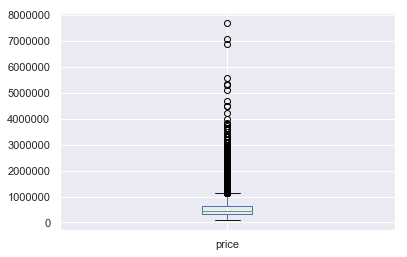

In [35]:
kc['price'].plot(kind='box');

To Do: Get rid of outliers and use log10 to make the prices easier to read. I choose log10 when dealing with currency because it is a base 10 system.

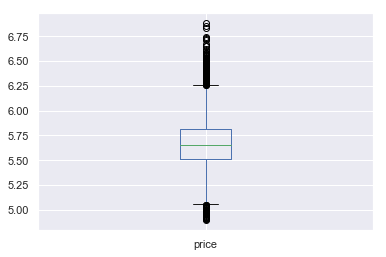

In [39]:
kc['price'].plot(kind='box');

In [38]:
kc['price'] = np.log10(kc['price'])

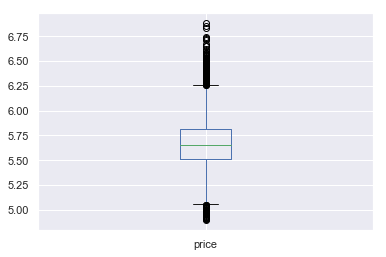

In [41]:
#Less skewed at least, perhaps removing other outliers
#will decrease number of outliers in price
kc['price'].plot(kind='box');

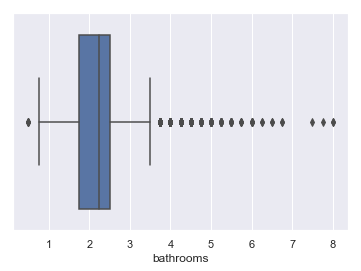